# Question 1:                    

1. Replicate the test accuracy graph on M02-S09.
2. Show me your weight visualization, too.
3. Please do not use any advanced optimization methods (Adam, batch norm, dropout, etc.) or
initialization methods (Xavier and so on). Plan SGD should just work.
4. In TF 2.x, you can do something like this to download the MNIST dataset:
mnist = tf.keras.datasets.mnist

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.initializers import RandomNormal, glorot_normal, he_normal

C:\Users\Pooja Parab\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Visualize the data

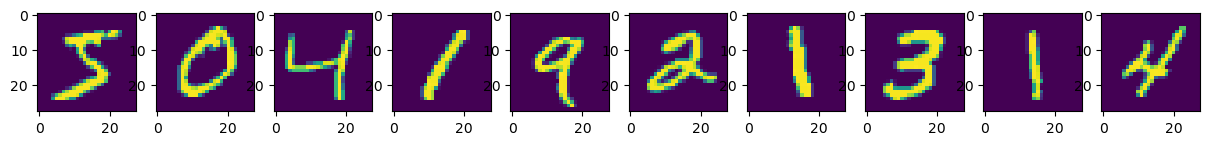

<Figure size 640x480 with 0 Axes>

In [5]:
fig, axarr=plt.subplots(1, 10, figsize=(15, 5))
plt.figure()
for i in range(10):
  axarr[i].imshow(X_train[i])
  axarr[i].grid(False)
plt.show()


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [7]:
history=model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test), shuffle=True,batch_size=64)


Epoch 1/200
938/938 [==============================] - 3s 3ms/step - loss: 0.9917 - accuracy: 0.7685 - val_loss: 0.6087 - val_accuracy: 0.8645
Epoch 2/200
938/938 [==============================] - 2s 2ms/step - loss: 0.5576 - accuracy: 0.8633 - val_loss: 0.4811 - val_accuracy: 0.8823
Epoch 3/200
938/938 [==============================] - 2s 2ms/step - loss: 0.4761 - accuracy: 0.8771 - val_loss: 0.4296 - val_accuracy: 0.8925
Epoch 4/200
938/938 [==============================] - 2s 2ms/step - loss: 0.4364 - accuracy: 0.8845 - val_loss: 0.4006 - val_accuracy: 0.8969
Epoch 5/200
938/938 [==============================] - 3s 3ms/step - loss: 0.4117 - accuracy: 0.8896 - val_loss: 0.3811 - val_accuracy: 0.8994
Epoch 6/200
938/938 [==============================] - 2s 3ms/step - loss: 0.3946 - accuracy: 0.8933 - val_loss: 0.3671 - val_accuracy: 0.9024
Epoch 7/200
938/938 [==============================] - 2s 2ms/step - loss: 0.3816 - accuracy: 0.8961 - val_loss: 0.3568 - val_accuracy: 0.9041

Epoch 58/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2832 - accuracy: 0.9212 - val_loss: 0.2794 - val_accuracy: 0.9218
Epoch 59/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2828 - accuracy: 0.9214 - val_loss: 0.2791 - val_accuracy: 0.9222
Epoch 60/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2824 - accuracy: 0.9211 - val_loss: 0.2792 - val_accuracy: 0.9225
Epoch 61/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2819 - accuracy: 0.9218 - val_loss: 0.2787 - val_accuracy: 0.9219
Epoch 62/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2815 - accuracy: 0.9216 - val_loss: 0.2783 - val_accuracy: 0.9220
Epoch 63/200
938/938 [==============================] - 2s 3ms/step - loss: 0.2811 - accuracy: 0.9220 - val_loss: 0.2783 - val_accuracy: 0.9219
Epoch 64/200
938/938 [==============================] - 2s 2ms/step - loss: 0.2807 - accuracy: 0.9222 - val_loss: 0.2784 - val_accuracy:

Epoch 115/200
938/938 [==============================] - 2s 2ms/step - loss: 0.2674 - accuracy: 0.9260 - val_loss: 0.2712 - val_accuracy: 0.9223
Epoch 116/200
938/938 [==============================] - 2s 3ms/step - loss: 0.2672 - accuracy: 0.9261 - val_loss: 0.2708 - val_accuracy: 0.9225
Epoch 117/200
938/938 [==============================] - 2s 2ms/step - loss: 0.2670 - accuracy: 0.9265 - val_loss: 0.2710 - val_accuracy: 0.9226
Epoch 118/200
938/938 [==============================] - 2s 2ms/step - loss: 0.2668 - accuracy: 0.9264 - val_loss: 0.2708 - val_accuracy: 0.9233
Epoch 119/200
938/938 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9266 - val_loss: 0.2708 - val_accuracy: 0.9236
Epoch 120/200
938/938 [==============================] - 2s 2ms/step - loss: 0.2665 - accuracy: 0.9263 - val_loss: 0.2708 - val_accuracy: 0.9229
Epoch 121/200
938/938 [==============================] - 2s 2ms/step - loss: 0.2664 - accuracy: 0.9264 - val_loss: 0.2709 - val_ac

### Test accuracy Graph

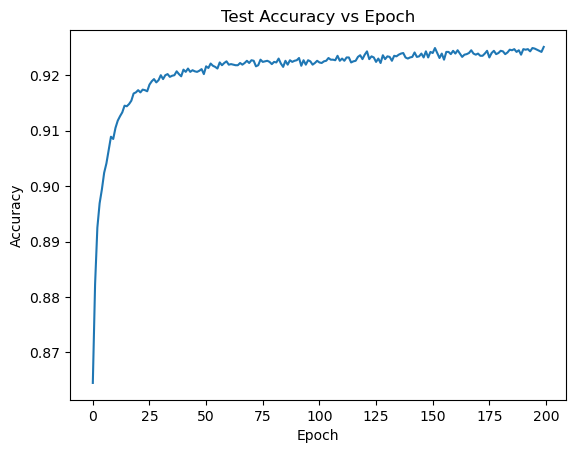

In [8]:
test_accuracy=history.history['val_accuracy']
plt.plot(test_accuracy)
plt.title('Test Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

### Conclusion: No Feature Accuracy is upto 92.5%

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
print(model.layers)

[<keras.src.layers.reshaping.flatten.Flatten object at 0x0000013D35F84490>, <keras.src.layers.core.dense.Dense object at 0x0000013D304F8070>]


### Weight Visualization

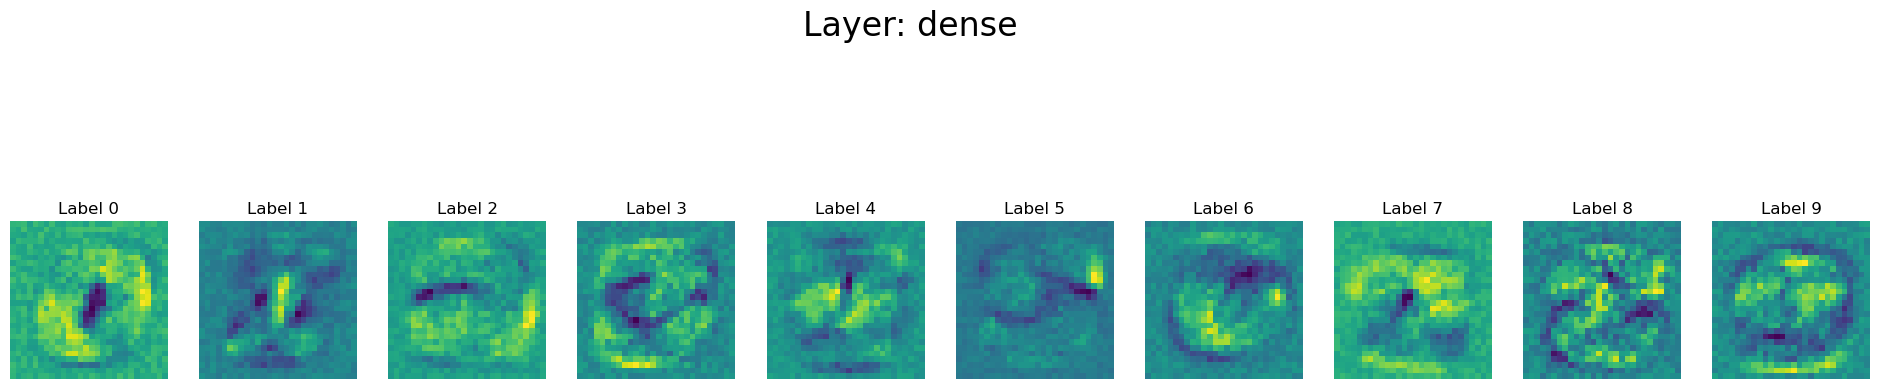

In [11]:
if isinstance(model.layers[1], tf.keras.layers.Dense):
    weights, _ = model.layers[1].get_weights()
    num_units = weights.shape[1]
    num_cols = 10  
    num_rows = (num_units + num_cols - 1) // num_cols  
    plt.figure(figsize=(24, 6))
    for i in range(num_units):
        plt.subplot(num_rows, num_cols, i + 1)
        weight_image = weights[:, i].reshape(28, 28)
        plt.imshow(weight_image)
        plt.title(f'Label {i}')
        plt.axis('off')
    plt.suptitle(f'Layer: {model.layers[1].name}', fontsize=24)
    plt.show()

# Question 2:

1. Replicate the test accuracy graph on M02-S12.
2. It means, you also want to show the figures in M02-S11.
3. Note that your encoder weights are frozen; you only update the softmax layer weights (the
100 × 10 matrix and the bias).

## Naive Encoder 

In [12]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(100, activation='sigmoid')
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      tf.keras.layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [13]:

shape = X_test.shape[1:]
latent_dim = 28
autoencoder_naive = Autoencoder(latent_dim, shape)
learning_rate = 0.25
naive_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
autoencoder_naive.compile(optimizer=naive_optimizer, loss=tf.keras.losses.MeanSquaredError())

autoencoder_naive.fit(X_train, X_train,epochs=200,shuffle=True,validation_data=(X_test, X_test), batch_size=64)

Epoch 1/200
938/938 [==============================] - 8s 8ms/step - loss: 0.1317 - val_loss: 0.0824
Epoch 2/200
938/938 [==============================] - 6s 7ms/step - loss: 0.0757 - val_loss: 0.0724
Epoch 3/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0710 - val_loss: 0.0703
Epoch 4/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0697 - val_loss: 0.0694
Epoch 5/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0690 - val_loss: 0.0690
Epoch 6/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0686 - val_loss: 0.0686
Epoch 7/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0683 - val_loss: 0.0684
Epoch 8/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0681 - val_loss: 0.0682
Epoch 9/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0680 - val_loss: 0.0681
Epoch 10/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0678 - val_lo

938/938 [==============================] - 7s 7ms/step - loss: 0.0450 - val_loss: 0.0446
Epoch 82/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0448 - val_loss: 0.0444
Epoch 83/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0446 - val_loss: 0.0442
Epoch 84/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0444 - val_loss: 0.0440
Epoch 85/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0442 - val_loss: 0.0438
Epoch 86/200
938/938 [==============================] - 7s 8ms/step - loss: 0.0440 - val_loss: 0.0436
Epoch 87/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0438 - val_loss: 0.0434
Epoch 88/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0436 - val_loss: 0.0432
Epoch 89/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0434 - val_loss: 0.0430
Epoch 90/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0432 - val_loss: 

Epoch 161/200
938/938 [==============================] - 6s 7ms/step - loss: 0.0344 - val_loss: 0.0340
Epoch 162/200
938/938 [==============================] - 6s 7ms/step - loss: 0.0343 - val_loss: 0.0339
Epoch 163/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0342 - val_loss: 0.0338
Epoch 164/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0341 - val_loss: 0.0337
Epoch 165/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0340 - val_loss: 0.0337
Epoch 166/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0339 - val_loss: 0.0336
Epoch 167/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0338 - val_loss: 0.0335
Epoch 168/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0337 - val_loss: 0.0334
Epoch 169/200
938/938 [==============================] - 7s 7ms/step - loss: 0.0337 - val_loss: 0.0333
Epoch 170/200
938/938 [==============================] - 7s 7ms/step - lo

### Naive Encoder Weight visualization

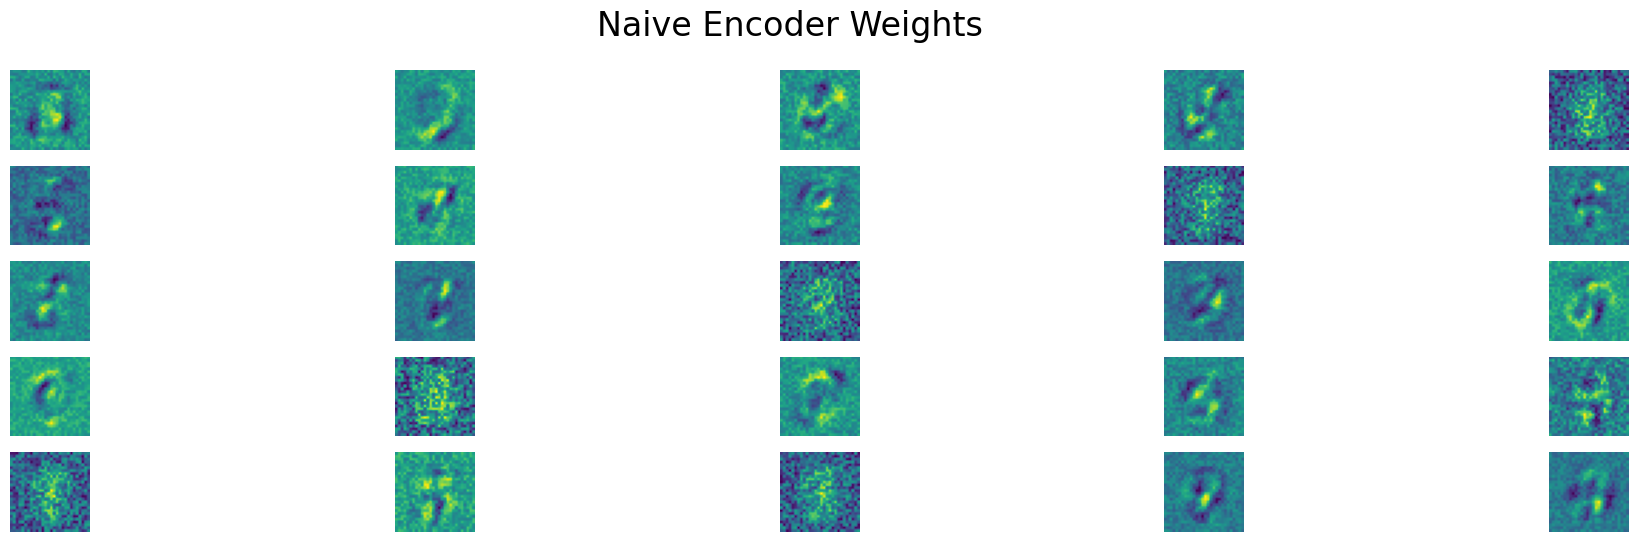

In [14]:
weights, _ = autoencoder_naive.layers[0].get_weights()
num_units = 25
num_cols = 5 
num_rows = (num_units + num_cols - 1) // num_cols  
plt.figure(figsize=(24, 6))
for i in range(num_units):
    plt.subplot(num_rows, num_cols, i + 1)
    weight_image = weights[:, i].reshape(28, 28)
    plt.imshow(weight_image, cmap='viridis')
    plt.axis('off')
plt.suptitle(f'Naive Encoder Weights', fontsize=24)
plt.show()




## Reconstruction of Naive Encoder

In [15]:
encoded_naive_imgs = autoencoder_naive.encoder(X_test).numpy()
decoded_naive_imgs = autoencoder_naive.decoder(encoded_naive_imgs).numpy()

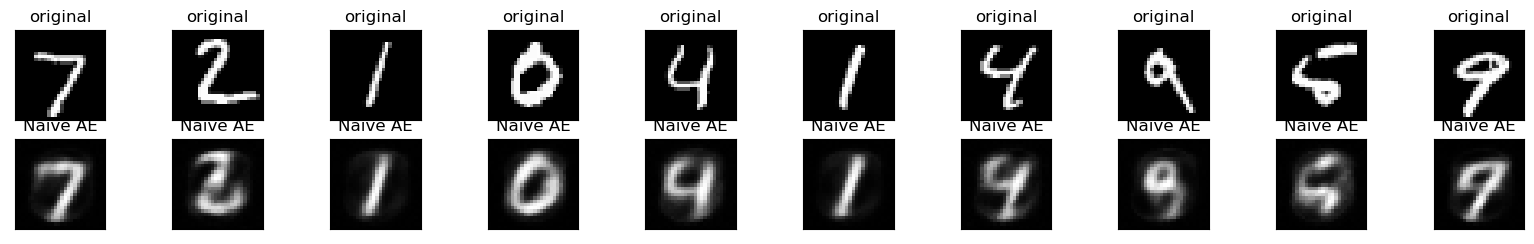

In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(decoded_naive_imgs[i])
  plt.title("Naive AE")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Encoder weights are frozen for naive

In [21]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

for layer in autoencoder_naive.layers[:-1]: 
    layer.trainable =False
    model.add(layer)

model.add(keras.layers.Dense(100, activation='sigmoid'))

model.add(keras.layers.Dense(10, activation='sigmoid'))  

model.compile(optimizer='sgd', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


history = model.fit(X_train, Y_train, epochs=200, batch_size=200, validation_data=(X_test, Y_test))

Epoch 1/200
300/300 [==============================] - 3s 7ms/step - loss: 2.2248 - accuracy: 0.2646 - val_loss: 2.1520 - val_accuracy: 0.4678
Epoch 2/200
300/300 [==============================] - 2s 5ms/step - loss: 2.0918 - accuracy: 0.5566 - val_loss: 2.0210 - val_accuracy: 0.6448
Epoch 3/200
300/300 [==============================] - 2s 6ms/step - loss: 1.9590 - accuracy: 0.6440 - val_loss: 1.8830 - val_accuracy: 0.6641
Epoch 4/200
300/300 [==============================] - 2s 5ms/step - loss: 1.8191 - accuracy: 0.6699 - val_loss: 1.7385 - val_accuracy: 0.7029
Epoch 5/200
300/300 [==============================] - 2s 5ms/step - loss: 1.6759 - accuracy: 0.6923 - val_loss: 1.5944 - val_accuracy: 0.7162
Epoch 6/200
300/300 [==============================] - 2s 6ms/step - loss: 1.5365 - accuracy: 0.7085 - val_loss: 1.4578 - val_accuracy: 0.7248
Epoch 7/200
300/300 [==============================] - 2s 6ms/step - loss: 1.4074 - accuracy: 0.7221 - val_loss: 1.3344 - val_accuracy: 0.7476

Epoch 58/200
300/300 [==============================] - 2s 5ms/step - loss: 0.5157 - accuracy: 0.8474 - val_loss: 0.4970 - val_accuracy: 0.8551
Epoch 59/200
300/300 [==============================] - 2s 5ms/step - loss: 0.5137 - accuracy: 0.8478 - val_loss: 0.4950 - val_accuracy: 0.8556
Epoch 60/200
300/300 [==============================] - 2s 6ms/step - loss: 0.5117 - accuracy: 0.8484 - val_loss: 0.4933 - val_accuracy: 0.8560
Epoch 61/200
300/300 [==============================] - 2s 6ms/step - loss: 0.5098 - accuracy: 0.8490 - val_loss: 0.4910 - val_accuracy: 0.8572
Epoch 62/200
300/300 [==============================] - 2s 6ms/step - loss: 0.5079 - accuracy: 0.8492 - val_loss: 0.4892 - val_accuracy: 0.8577
Epoch 63/200
300/300 [==============================] - 2s 6ms/step - loss: 0.5060 - accuracy: 0.8498 - val_loss: 0.4875 - val_accuracy: 0.8583
Epoch 64/200
300/300 [==============================] - 2s 6ms/step - loss: 0.5042 - accuracy: 0.8507 - val_loss: 0.4855 - val_accuracy:

Epoch 115/200
300/300 [==============================] - 2s 5ms/step - loss: 0.4440 - accuracy: 0.8680 - val_loss: 0.4268 - val_accuracy: 0.8726
Epoch 116/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4432 - accuracy: 0.8682 - val_loss: 0.4262 - val_accuracy: 0.8731
Epoch 117/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4423 - accuracy: 0.8687 - val_loss: 0.4251 - val_accuracy: 0.8742
Epoch 118/200
300/300 [==============================] - 2s 5ms/step - loss: 0.4415 - accuracy: 0.8687 - val_loss: 0.4245 - val_accuracy: 0.8737
Epoch 119/200
300/300 [==============================] - 2s 5ms/step - loss: 0.4406 - accuracy: 0.8691 - val_loss: 0.4236 - val_accuracy: 0.8740
Epoch 120/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4399 - accuracy: 0.8691 - val_loss: 0.4229 - val_accuracy: 0.8734
Epoch 121/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4390 - accuracy: 0.8695 - val_loss: 0.4221 - val_ac

300/300 [==============================] - 2s 5ms/step - loss: 0.4040 - accuracy: 0.8796 - val_loss: 0.3882 - val_accuracy: 0.8844
Epoch 172/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4034 - accuracy: 0.8800 - val_loss: 0.3876 - val_accuracy: 0.8845
Epoch 173/200
300/300 [==============================] - 2s 5ms/step - loss: 0.4028 - accuracy: 0.8802 - val_loss: 0.3869 - val_accuracy: 0.8850
Epoch 174/200
300/300 [==============================] - 2s 5ms/step - loss: 0.4021 - accuracy: 0.8805 - val_loss: 0.3866 - val_accuracy: 0.8851
Epoch 175/200
300/300 [==============================] - 2s 5ms/step - loss: 0.4015 - accuracy: 0.8806 - val_loss: 0.3862 - val_accuracy: 0.8857
Epoch 176/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4009 - accuracy: 0.8809 - val_loss: 0.3852 - val_accuracy: 0.8852
Epoch 177/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4002 - accuracy: 0.8806 - val_loss: 0.3851 - val_accuracy: 0.8858

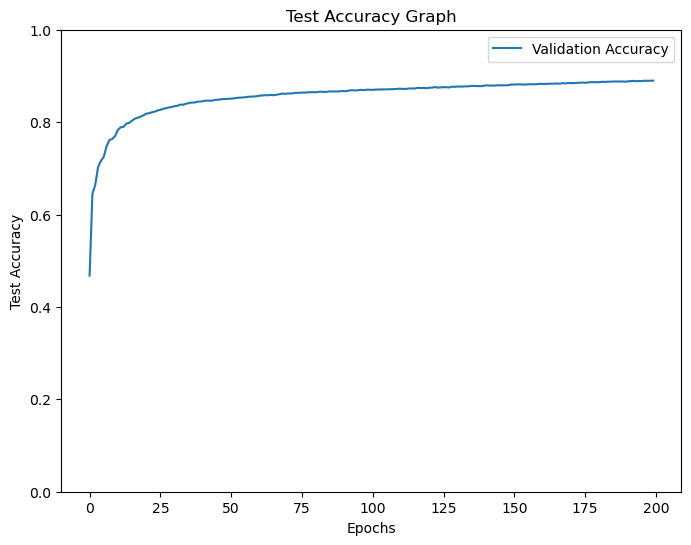

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.ylim(0,1)
plt.legend()
plt.title('Test Accuracy Graph')
plt.show()

### Conclusion: Naive Encoder Accuracy(Encoder Weight Frozen) is upto 88.98%

## Hidden unit Activation Naive

Text(0.5, 1.0, 'Naive Autoencoder Activations')

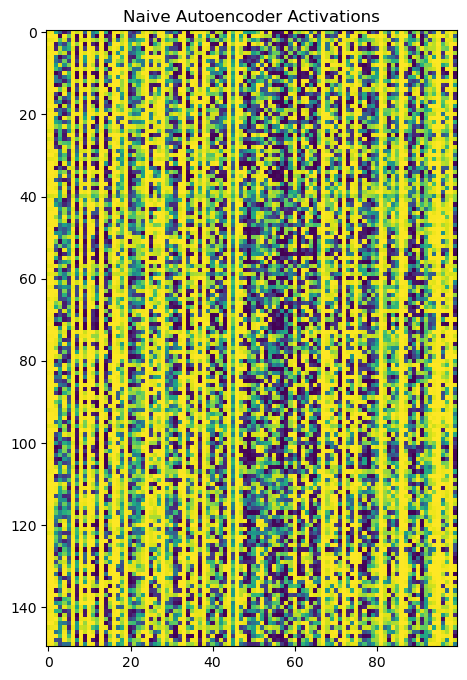

In [183]:
naive_hidden_activations = autoencoder_naive.encoder(X_test).numpy()
grid_size = (150,100)
naive_activation_grid = np.resize(naive_hidden_activations, grid_size)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(naive_activation_grid, cmap='viridis')
plt.title('Naive Autoencoder Activations')


## Sparse Encoder

In [108]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(100, activation='sigmoid',kernel_initializer=RandomNormal(stddev=0.01))
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid',kernel_initializer=RandomNormal(stddev=0.01)),
      tf.keras.layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [8]:
def custom_loss(alpha, lambda_reg):
    def loss(y_true, y_pred):
        mse_loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
        sparsity = tf.reduce_mean(y_pred)
        sparsity_loss = alpha * tf.abs(lambda_reg - sparsity)
        total_loss = mse_loss + sparsity_loss
        return total_loss
    return loss


Cutom Loss function:

$$
\text{Custom Loss}(\alpha, \lambda_{\text{reg}}) = \text{MSE Loss}(y_{\text{true}}, y_{\text{pred}}) + \alpha \cdot |\lambda_{\text{reg}} - \text{Sparsity}|
$$
Where:
$$
\alpha {\text{is weight of the sparsity}}.
$$
$$
\lambda_ {\text{reg}} {\text{is level of sparsity}}.
$$
$$
\text{MSE Loss}(y_{\text{true}}, y_{\text{pred}}) {\text{is the mean squared error loss}} 
$$



In [110]:
shape = X_test.shape[1:]
latent_dim = 28

lambda_reg = 0.2
alpha = 0.2
batch_size = 64
learning_rate= 0.5
sparse_autoencoder = Autoencoder(latent_dim,shape)
sparse_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

custom_loss = custom_loss(alpha, lambda_reg)
sparse_autoencoder.compile(optimizer=sparse_optimizer, loss=custom_loss)

sparse_autoencoder.fit(X_train, X_train, epochs=200, shuffle=True, validation_data=(X_test, X_test), batch_size=200)

Epoch 1/200
300/300 [==============================] - 4s 10ms/step - loss: 0.1679 - val_loss: 0.0902
Epoch 2/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0785 - val_loss: 0.0757
Epoch 3/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0741 - val_loss: 0.0739
Epoch 4/200
300/300 [==============================] - 3s 9ms/step - loss: 0.0732 - val_loss: 0.0733
Epoch 5/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0728 - val_loss: 0.0731
Epoch 6/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0727 - val_loss: 0.0729
Epoch 7/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0726 - val_loss: 0.0728
Epoch 8/200
300/300 [==============================] - 3s 9ms/step - loss: 0.0726 - val_loss: 0.0729
Epoch 9/200
300/300 [==============================] - 3s 9ms/step - loss: 0.0725 - val_loss: 0.0727
Epoch 10/200
300/300 [==============================] - 3s 9ms/step - loss: 0.0725 - val_l

Epoch 161/200
300/300 [==============================] - 1s 5ms/step - loss: 0.0489 - val_loss: 0.0485
Epoch 162/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0487 - val_loss: 0.0484
Epoch 163/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0486 - val_loss: 0.0483
Epoch 164/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0485 - val_loss: 0.0482
Epoch 165/200
300/300 [==============================] - 1s 5ms/step - loss: 0.0485 - val_loss: 0.0481
Epoch 166/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0483 - val_loss: 0.0480
Epoch 167/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0482 - val_loss: 0.0479
Epoch 168/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0481 - val_loss: 0.0478
Epoch 169/200
300/300 [==============================] - 1s 5ms/step - loss: 0.0480 - val_loss: 0.0477
Epoch 170/200
300/300 [==============================] - 1s 4ms/step - lo

### Sparse Encoder Weight Visualization

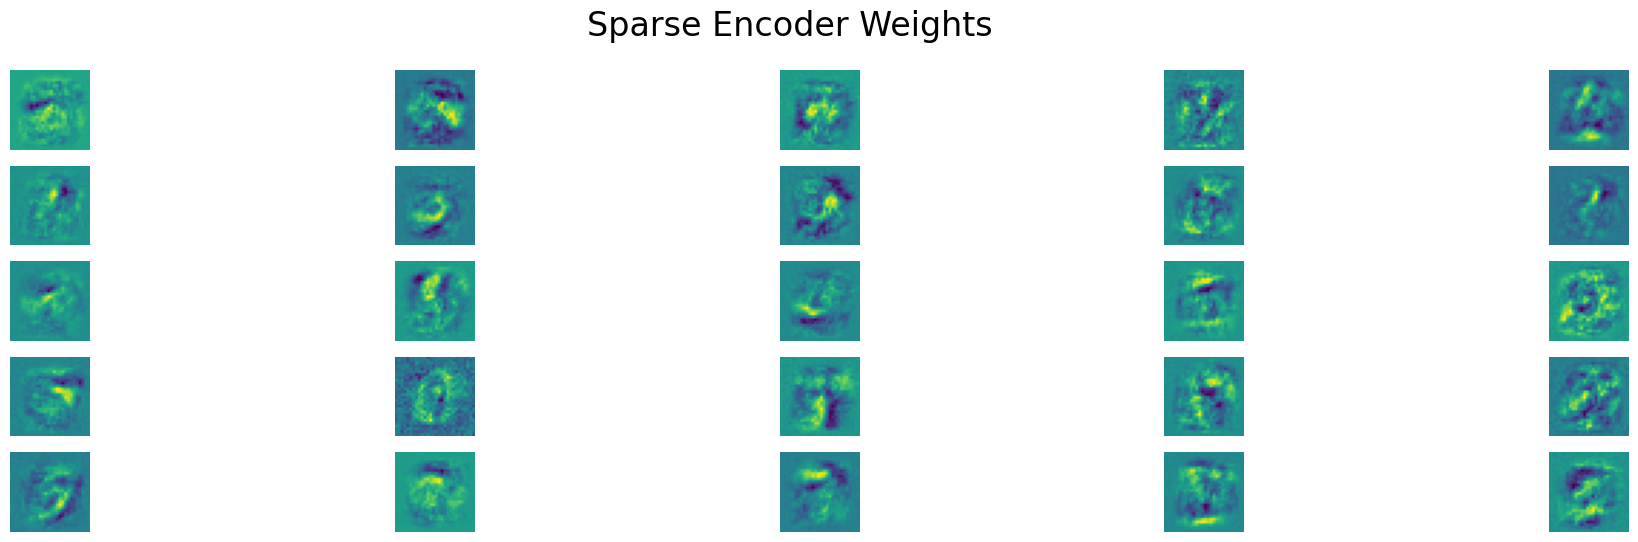

In [149]:
weights, _ = sparse_autoencoder.layers[0].get_weights()
num_units = 25
num_cols = 5 
num_rows = (num_units + num_cols - 1) // num_cols  
plt.figure(figsize=(24, 6))
for i in range(num_units):
    plt.subplot(num_rows, num_cols, i + 1)
    weight_image = weights[:, i].reshape(28, 28)
    plt.imshow(weight_image, cmap='viridis')
    plt.axis('off')
plt.suptitle(f'Sparse Encoder Weights', fontsize=24)
plt.show()



In [111]:
encoded_sparse_imgs = sparse_autoencoder.encoder(X_test).numpy()
decoded_sparse_imgs = sparse_autoencoder.decoder(encoded_sparse_imgs).numpy()

### Sparse Encoder Reconstruction

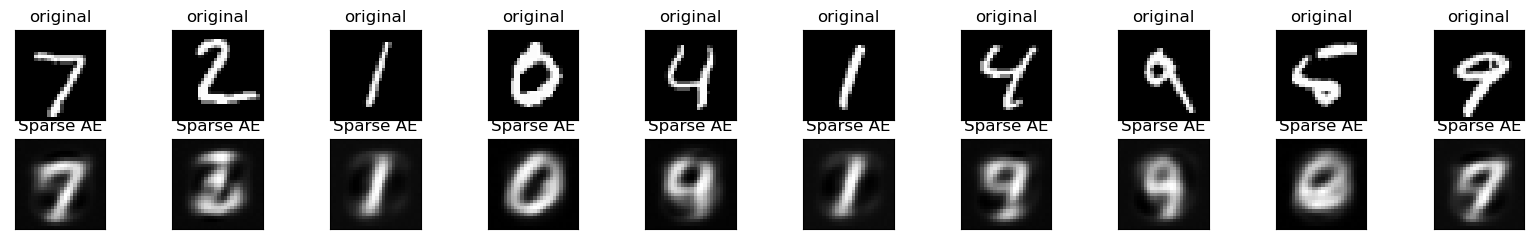

In [129]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(decoded_sparse_imgs[i])
  plt.title("Sparse AE")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Sparse encoder Weight frozen

In [113]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
for layer in sparse_autoencoder.layers[:-1]: 
    layer.trainable =False
    model.add(layer)

model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='sigmoid')) 
learning_rate=0.1
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=200, batch_size=200, validation_data=(X_test, Y_test))

Epoch 1/200
300/300 [==============================] - 2s 6ms/step - loss: 1.6053 - accuracy: 0.6046 - val_loss: 1.0576 - val_accuracy: 0.7321
Epoch 2/200
300/300 [==============================] - 2s 5ms/step - loss: 0.9067 - accuracy: 0.7387 - val_loss: 0.7891 - val_accuracy: 0.7573
Epoch 3/200
300/300 [==============================] - 1s 5ms/step - loss: 0.7596 - accuracy: 0.7613 - val_loss: 0.7067 - val_accuracy: 0.7759
Epoch 4/200
300/300 [==============================] - 2s 5ms/step - loss: 0.7007 - accuracy: 0.7747 - val_loss: 0.6614 - val_accuracy: 0.7889
Epoch 5/200
300/300 [==============================] - 1s 5ms/step - loss: 0.6653 - accuracy: 0.7860 - val_loss: 0.6311 - val_accuracy: 0.7959
Epoch 6/200
300/300 [==============================] - 2s 5ms/step - loss: 0.6397 - accuracy: 0.7940 - val_loss: 0.6090 - val_accuracy: 0.8069
Epoch 7/200
300/300 [==============================] - 2s 5ms/step - loss: 0.6199 - accuracy: 0.8016 - val_loss: 0.5925 - val_accuracy: 0.8109

Epoch 58/200
300/300 [==============================] - 1s 4ms/step - loss: 0.3067 - accuracy: 0.9066 - val_loss: 0.3012 - val_accuracy: 0.9113
Epoch 59/200
300/300 [==============================] - 1s 4ms/step - loss: 0.3043 - accuracy: 0.9077 - val_loss: 0.2961 - val_accuracy: 0.9154
Epoch 60/200
300/300 [==============================] - 1s 4ms/step - loss: 0.3023 - accuracy: 0.9081 - val_loss: 0.2941 - val_accuracy: 0.9130
Epoch 61/200
300/300 [==============================] - 1s 4ms/step - loss: 0.2998 - accuracy: 0.9079 - val_loss: 0.2929 - val_accuracy: 0.9143
Epoch 62/200
300/300 [==============================] - 1s 4ms/step - loss: 0.2979 - accuracy: 0.9090 - val_loss: 0.2911 - val_accuracy: 0.9150
Epoch 63/200
300/300 [==============================] - 1s 4ms/step - loss: 0.2957 - accuracy: 0.9102 - val_loss: 0.2874 - val_accuracy: 0.9151
Epoch 64/200
300/300 [==============================] - 1s 4ms/step - loss: 0.2937 - accuracy: 0.9108 - val_loss: 0.2862 - val_accuracy:

Epoch 115/200
300/300 [==============================] - 1s 4ms/step - loss: 0.2327 - accuracy: 0.9285 - val_loss: 0.2289 - val_accuracy: 0.9315
Epoch 116/200
300/300 [==============================] - 2s 5ms/step - loss: 0.2319 - accuracy: 0.9291 - val_loss: 0.2270 - val_accuracy: 0.9316
Epoch 117/200
300/300 [==============================] - 1s 5ms/step - loss: 0.2313 - accuracy: 0.9291 - val_loss: 0.2272 - val_accuracy: 0.9327
Epoch 118/200
300/300 [==============================] - 2s 5ms/step - loss: 0.2307 - accuracy: 0.9289 - val_loss: 0.2272 - val_accuracy: 0.9316
Epoch 119/200
300/300 [==============================] - 2s 6ms/step - loss: 0.2301 - accuracy: 0.9290 - val_loss: 0.2258 - val_accuracy: 0.9303
Epoch 120/200
300/300 [==============================] - 2s 6ms/step - loss: 0.2291 - accuracy: 0.9295 - val_loss: 0.2247 - val_accuracy: 0.9328
Epoch 121/200
300/300 [==============================] - 2s 6ms/step - loss: 0.2287 - accuracy: 0.9293 - val_loss: 0.2229 - val_ac

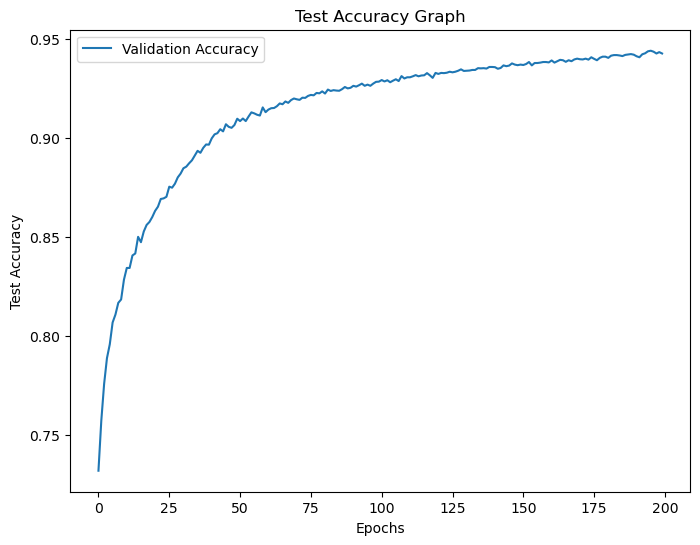

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracy Graph')
plt.show()

### Conclusion: Sparse Encoder Accuracy(First layer weights frozen) is upto 94.26%

### Sparse Hidden activation units

Text(0.5, 1.0, 'Sparse Autoencoder Activations')

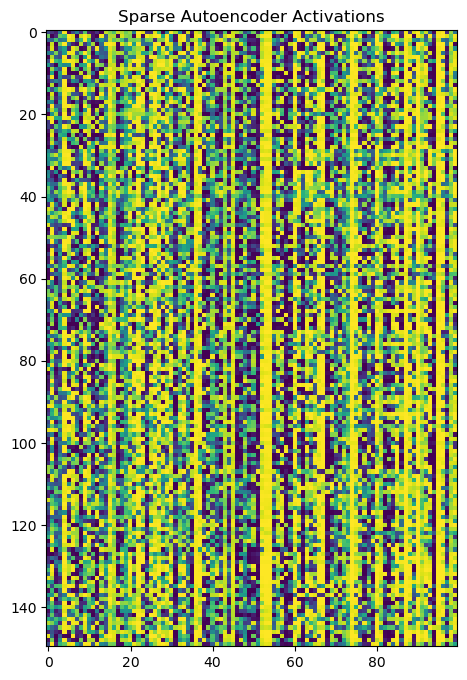

In [185]:
sparse_hidden_activations = sparse_autoencoder.encoder(X_test).numpy()
grid_size = (150,100)
sparse_activation_grid = np.resize(sparse_hidden_activations, grid_size)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(sparse_activation_grid, cmap='viridis')
plt.title('Sparse Autoencoder Activations')


# Question 3

1. Replicate the test accuracy graph on M02-S14.
2. I don’t have to see the visualization of the first layer. Just show me your graphs.

In [105]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64,activation='relu' ),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [106]:
history=model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test), shuffle=True,batch_size=64)


Epoch 1/200
938/938 [==============================] - 5s 4ms/step - loss: 0.9185 - accuracy: 0.7706 - val_loss: 0.4783 - val_accuracy: 0.8792
Epoch 2/200
938/938 [==============================] - 4s 4ms/step - loss: 0.4306 - accuracy: 0.8859 - val_loss: 0.3688 - val_accuracy: 0.8988
Epoch 3/200
938/938 [==============================] - 4s 4ms/step - loss: 0.3628 - accuracy: 0.8992 - val_loss: 0.3265 - val_accuracy: 0.9086
Epoch 4/200
938/938 [==============================] - 4s 4ms/step - loss: 0.3302 - accuracy: 0.9077 - val_loss: 0.3020 - val_accuracy: 0.9141
Epoch 5/200
938/938 [==============================] - 3s 4ms/step - loss: 0.3083 - accuracy: 0.9134 - val_loss: 0.2875 - val_accuracy: 0.9191
Epoch 6/200
938/938 [==============================] - 4s 4ms/step - loss: 0.2916 - accuracy: 0.9179 - val_loss: 0.2718 - val_accuracy: 0.9234
Epoch 7/200
938/938 [==============================] - 4s 4ms/step - loss: 0.2777 - accuracy: 0.9221 - val_loss: 0.2608 - val_accuracy: 0.9267

Epoch 58/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0896 - accuracy: 0.9755 - val_loss: 0.1050 - val_accuracy: 0.9682
Epoch 59/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0885 - accuracy: 0.9756 - val_loss: 0.1047 - val_accuracy: 0.9671
Epoch 60/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0874 - accuracy: 0.9761 - val_loss: 0.1054 - val_accuracy: 0.9681
Epoch 61/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0864 - accuracy: 0.9763 - val_loss: 0.1032 - val_accuracy: 0.9681
Epoch 62/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0853 - accuracy: 0.9767 - val_loss: 0.1032 - val_accuracy: 0.9674
Epoch 63/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0843 - accuracy: 0.9766 - val_loss: 0.1017 - val_accuracy: 0.9683
Epoch 64/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0835 - accuracy: 0.9774 - val_loss: 0.1006 - val_accuracy:

Epoch 115/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0513 - accuracy: 0.9865 - val_loss: 0.0838 - val_accuracy: 0.9750
Epoch 116/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0509 - accuracy: 0.9865 - val_loss: 0.0830 - val_accuracy: 0.9744
Epoch 117/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0505 - accuracy: 0.9866 - val_loss: 0.0842 - val_accuracy: 0.9744
Epoch 118/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0502 - accuracy: 0.9868 - val_loss: 0.0833 - val_accuracy: 0.9749
Epoch 119/200
938/938 [==============================] - 4s 5ms/step - loss: 0.0496 - accuracy: 0.9872 - val_loss: 0.0831 - val_accuracy: 0.9744
Epoch 120/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0493 - accuracy: 0.9871 - val_loss: 0.0834 - val_accuracy: 0.9747
Epoch 121/200
938/938 [==============================] - 4s 4ms/step - loss: 0.0490 - accuracy: 0.9872 - val_loss: 0.0825 - val_ac

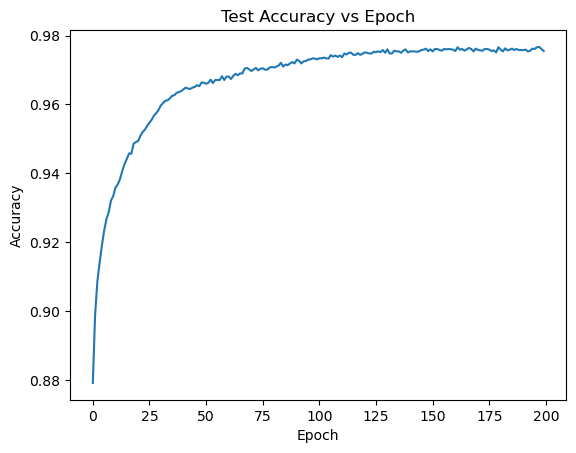

In [107]:
test_accuracy=history.history['val_accuracy']
plt.plot(test_accuracy)
plt.title('Test Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

### Conclusion: NN Accuracy is upto 97.5%

# Question 4

Problem 4: Full BP on the both layers [6 points]
1. Replicate the test accuracy graph on M02-S17.

Replicate the figures in M03 Adult Optimization, slide 22 using the details as follows:

1. Use the same network architecture and train five different network instances in five different
setups. The architecture has to be a fully connected network (a regular network, not a CNN
or RNN) with five hidden layers, 512 hidden units per layer.
2. Create five different networks that share the same architecture as follows:
(a) Activation function: the logistic sigmoid function; initialization: random numbers generated
from the normal distribution (μ = 0, σ = 0.01)
(b) Activation function: the logistic sigmoid function; initialization: Xavier initializer
(c) Activation function: ReLU; initialization: random numbers generated from the normal
distribution (μ = 0, σ = 0.01)
(d) Activation function: ReLU; initialization: Xavier initializer
(e) Activation function: ReLU; initialization: Kaiming He’s initializer
3. You don’t have to implement your own initializer. Both TF and PT come with pre-implemented
initializers.

# 4. Part 1

### Naive Autoencoder with backpropogation

In [150]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

for layer in autoencoder_naive.layers[:-1]: 
    layer.trainable =True
    model.add(layer)

model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='sigmoid'))  
model.compile(optimizer='sgd', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=200, batch_size=200,validation_data=(X_test, Y_test))

Epoch 1/200
300/300 [==============================] - 5s 12ms/step - loss: 2.2318 - accuracy: 0.2836 - val_loss: 2.1558 - val_accuracy: 0.4033
Epoch 2/200
300/300 [==============================] - 2s 8ms/step - loss: 2.0968 - accuracy: 0.4930 - val_loss: 2.0259 - val_accuracy: 0.5736
Epoch 3/200
300/300 [==============================] - 2s 8ms/step - loss: 1.9633 - accuracy: 0.5946 - val_loss: 1.8847 - val_accuracy: 0.6364
Epoch 4/200
300/300 [==============================] - 2s 8ms/step - loss: 1.8197 - accuracy: 0.6491 - val_loss: 1.7360 - val_accuracy: 0.6764
Epoch 5/200
300/300 [==============================] - 3s 8ms/step - loss: 1.6711 - accuracy: 0.6822 - val_loss: 1.5864 - val_accuracy: 0.6907
Epoch 6/200
300/300 [==============================] - 2s 8ms/step - loss: 1.5254 - accuracy: 0.7034 - val_loss: 1.4438 - val_accuracy: 0.7210
Epoch 7/200
300/300 [==============================] - 2s 8ms/step - loss: 1.3903 - accuracy: 0.7231 - val_loss: 1.3151 - val_accuracy: 0.736

Epoch 58/200
300/300 [==============================] - 2s 8ms/step - loss: 0.3730 - accuracy: 0.8956 - val_loss: 0.3629 - val_accuracy: 0.8996
Epoch 59/200
300/300 [==============================] - 2s 8ms/step - loss: 0.3699 - accuracy: 0.8960 - val_loss: 0.3600 - val_accuracy: 0.9009
Epoch 60/200
300/300 [==============================] - 2s 8ms/step - loss: 0.3668 - accuracy: 0.8967 - val_loss: 0.3575 - val_accuracy: 0.9006
Epoch 61/200
300/300 [==============================] - 2s 7ms/step - loss: 0.3639 - accuracy: 0.8977 - val_loss: 0.3544 - val_accuracy: 0.9011
Epoch 62/200
300/300 [==============================] - 2s 7ms/step - loss: 0.3610 - accuracy: 0.8985 - val_loss: 0.3517 - val_accuracy: 0.9015
Epoch 63/200
300/300 [==============================] - 2s 7ms/step - loss: 0.3582 - accuracy: 0.8990 - val_loss: 0.3492 - val_accuracy: 0.9025
Epoch 64/200
300/300 [==============================] - 2s 7ms/step - loss: 0.3555 - accuracy: 0.8999 - val_loss: 0.3462 - val_accuracy:

Epoch 115/200
300/300 [==============================] - 2s 6ms/step - loss: 0.2690 - accuracy: 0.9231 - val_loss: 0.2644 - val_accuracy: 0.9248
Epoch 116/200
300/300 [==============================] - 3s 9ms/step - loss: 0.2678 - accuracy: 0.9232 - val_loss: 0.2636 - val_accuracy: 0.9255
Epoch 117/200
300/300 [==============================] - 2s 6ms/step - loss: 0.2668 - accuracy: 0.9236 - val_loss: 0.2624 - val_accuracy: 0.9255
Epoch 118/200
300/300 [==============================] - 2s 6ms/step - loss: 0.2657 - accuracy: 0.9241 - val_loss: 0.2614 - val_accuracy: 0.9263
Epoch 119/200
300/300 [==============================] - 2s 8ms/step - loss: 0.2646 - accuracy: 0.9242 - val_loss: 0.2604 - val_accuracy: 0.9264
Epoch 120/200
300/300 [==============================] - 2s 7ms/step - loss: 0.2635 - accuracy: 0.9244 - val_loss: 0.2593 - val_accuracy: 0.9266
Epoch 121/200
300/300 [==============================] - 2s 7ms/step - loss: 0.2625 - accuracy: 0.9249 - val_loss: 0.2582 - val_ac

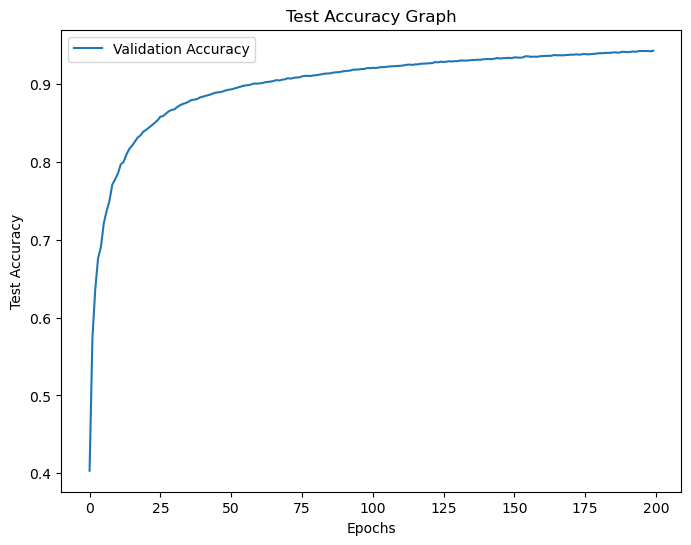

In [151]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracy Graph')
plt.show()

### Conclusion: Full BP on both the layers Naive Encoder is upto 94.3%

### Sparse Autoencoder with backpropogation

In [118]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

for layer in sparse_autoencoder.layers[:-1]: 
    layer.trainable =True
    model.add(layer)

model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='sigmoid')) 
learning_rate=0.1
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=200, batch_size=200,validation_data=(X_test, Y_test))

Epoch 1/200
300/300 [==============================] - 2s 6ms/step - loss: 1.5504 - accuracy: 0.6170 - val_loss: 0.9952 - val_accuracy: 0.7315
Epoch 2/200
300/300 [==============================] - 2s 6ms/step - loss: 0.8182 - accuracy: 0.7739 - val_loss: 0.6771 - val_accuracy: 0.8039
Epoch 3/200
300/300 [==============================] - 2s 6ms/step - loss: 0.6206 - accuracy: 0.8186 - val_loss: 0.5452 - val_accuracy: 0.8444
Epoch 4/200
300/300 [==============================] - 2s 6ms/step - loss: 0.5165 - accuracy: 0.8510 - val_loss: 0.4612 - val_accuracy: 0.8726
Epoch 5/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4464 - accuracy: 0.8737 - val_loss: 0.4069 - val_accuracy: 0.8866
Epoch 6/200
300/300 [==============================] - 2s 6ms/step - loss: 0.3977 - accuracy: 0.8890 - val_loss: 0.3651 - val_accuracy: 0.8987
Epoch 7/200
300/300 [==============================] - 2s 6ms/step - loss: 0.3623 - accuracy: 0.8985 - val_loss: 0.3385 - val_accuracy: 0.9035

Epoch 58/200
300/300 [==============================] - 2s 6ms/step - loss: 0.0996 - accuracy: 0.9719 - val_loss: 0.1133 - val_accuracy: 0.9651
Epoch 59/200
300/300 [==============================] - 2s 5ms/step - loss: 0.0982 - accuracy: 0.9722 - val_loss: 0.1125 - val_accuracy: 0.9659
Epoch 60/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0968 - accuracy: 0.9732 - val_loss: 0.1105 - val_accuracy: 0.9660
Epoch 61/200
300/300 [==============================] - 1s 5ms/step - loss: 0.0954 - accuracy: 0.9728 - val_loss: 0.1110 - val_accuracy: 0.9659
Epoch 62/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0940 - accuracy: 0.9735 - val_loss: 0.1085 - val_accuracy: 0.9669
Epoch 63/200
300/300 [==============================] - 2s 6ms/step - loss: 0.0928 - accuracy: 0.9738 - val_loss: 0.1084 - val_accuracy: 0.9668
Epoch 64/200
300/300 [==============================] - 2s 6ms/step - loss: 0.0916 - accuracy: 0.9748 - val_loss: 0.1071 - val_accuracy:

Epoch 115/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0503 - accuracy: 0.9866 - val_loss: 0.0824 - val_accuracy: 0.9739
Epoch 116/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0498 - accuracy: 0.9868 - val_loss: 0.0818 - val_accuracy: 0.9735
Epoch 117/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0492 - accuracy: 0.9868 - val_loss: 0.0822 - val_accuracy: 0.9735
Epoch 118/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0488 - accuracy: 0.9868 - val_loss: 0.0808 - val_accuracy: 0.9739
Epoch 119/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0481 - accuracy: 0.9875 - val_loss: 0.0813 - val_accuracy: 0.9738
Epoch 120/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0477 - accuracy: 0.9876 - val_loss: 0.0804 - val_accuracy: 0.9742
Epoch 121/200
300/300 [==============================] - 1s 4ms/step - loss: 0.0473 - accuracy: 0.9876 - val_loss: 0.0803 - val_ac

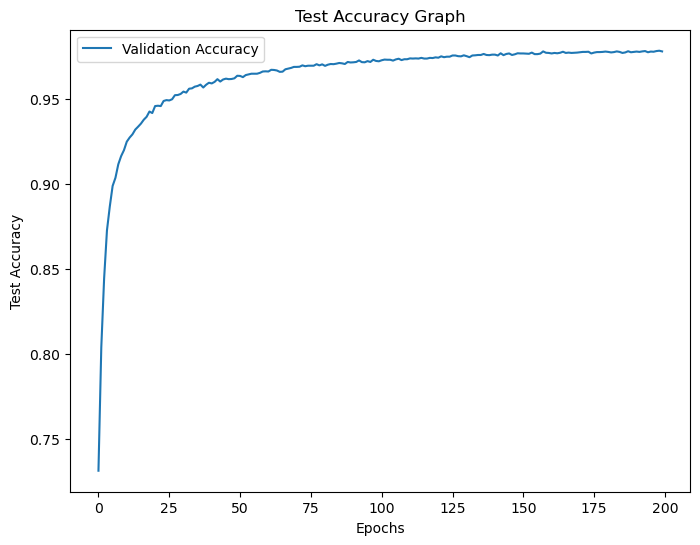

In [119]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracy Graph')
plt.show()

### Conclusion: Full BP on both the layers Sparse Encoder is upto 97.7%

# 4. Part 2

In [121]:
# Setup 1 : Logistic and RandomNormal(mean=0.0, stddev=0.01)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))),
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer

model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_1 = model.fit(X_train, Y_train, epochs=200, batch_size=200,validation_data=(X_test, Y_test))


Epoch 1/200
300/300 [==============================] - 6s 17ms/step - loss: 2.3057 - accuracy: 0.1068 - val_loss: 2.3022 - val_accuracy: 0.1009
Epoch 2/200
300/300 [==============================] - 5s 16ms/step - loss: 2.3031 - accuracy: 0.1087 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 3/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3029 - accuracy: 0.1065 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 4/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3030 - accuracy: 0.1098 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 5/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3029 - accuracy: 0.1087 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 6/200
300/300 [==============================] - 6s 20ms/step - loss: 2.3031 - accuracy: 0.1081 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 7/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3029 - accuracy: 0.1080 - val_loss: 2.3030 - val_accuracy:

300/300 [==============================] - 7s 22ms/step - loss: 2.3028 - accuracy: 0.1091 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 114/200
300/300 [==============================] - 7s 22ms/step - loss: 2.3028 - accuracy: 0.1076 - val_loss: 2.3035 - val_accuracy: 0.1135
Epoch 115/200
300/300 [==============================] - 7s 23ms/step - loss: 2.3029 - accuracy: 0.1089 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 116/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3029 - accuracy: 0.1087 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 117/200
300/300 [==============================] - 7s 22ms/step - loss: 2.3027 - accuracy: 0.1080 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 118/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3027 - accuracy: 0.1095 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 119/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3028 - accuracy: 0.1093 - val_loss: 2.3013 - val_accuracy:

In [122]:
# Setup 2 Logistic and Xavier initializer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))),
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  


model.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history_2 = model.fit(X_train, Y_train, epochs=200, batch_size=200,validation_data=(X_test, Y_test))


Epoch 1/200
300/300 [==============================] - 8s 22ms/step - loss: 2.3050 - accuracy: 0.1091 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 2/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3032 - accuracy: 0.1082 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 3/200
300/300 [==============================] - 7s 22ms/step - loss: 2.3033 - accuracy: 0.1070 - val_loss: 2.3034 - val_accuracy: 0.1009
Epoch 4/200
300/300 [==============================] - 7s 22ms/step - loss: 2.3031 - accuracy: 0.1070 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 5/200
300/300 [==============================] - 7s 24ms/step - loss: 2.3030 - accuracy: 0.1088 - val_loss: 2.3032 - val_accuracy: 0.1010
Epoch 6/200
300/300 [==============================] - 7s 22ms/step - loss: 2.3032 - accuracy: 0.1085 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 7/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3033 - accuracy: 0.1083 - val_loss: 2.3023 - val_accuracy:

300/300 [==============================] - 6s 21ms/step - loss: 2.2998 - accuracy: 0.1141 - val_loss: 2.3002 - val_accuracy: 0.1135
Epoch 114/200
300/300 [==============================] - 6s 22ms/step - loss: 2.2998 - accuracy: 0.1155 - val_loss: 2.2988 - val_accuracy: 0.1135
Epoch 115/200
300/300 [==============================] - 6s 21ms/step - loss: 2.2996 - accuracy: 0.1174 - val_loss: 2.3003 - val_accuracy: 0.0958
Epoch 116/200
300/300 [==============================] - 6s 21ms/step - loss: 2.2996 - accuracy: 0.1142 - val_loss: 2.3003 - val_accuracy: 0.1135
Epoch 117/200
300/300 [==============================] - 7s 23ms/step - loss: 2.2994 - accuracy: 0.1163 - val_loss: 2.2985 - val_accuracy: 0.1135
Epoch 118/200
300/300 [==============================] - 7s 22ms/step - loss: 2.2992 - accuracy: 0.1147 - val_loss: 2.2999 - val_accuracy: 0.1773
Epoch 119/200
300/300 [==============================] - 6s 21ms/step - loss: 2.2995 - accuracy: 0.1132 - val_loss: 2.2993 - val_accuracy:

In [123]:
# Setup 3 Relu and RandomNormal(mean=0.0, stddev=0.01)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))),
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=RandomNormal(mean=0.0, stddev=0.01)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  

model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history_3 = model.fit(X_train, Y_train, epochs=200, batch_size=200, validation_data=(X_test, Y_test))


Epoch 1/200
300/300 [==============================] - 9s 25ms/step - loss: 2.3021 - accuracy: 0.1116 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/200
300/300 [==============================] - 7s 25ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/200
300/300 [==============================] - 7s 22ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/200
300/300 [==============================] - 6s 20ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 5/200
300/300 [==============================] - 6s 21ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 6/200
300/300 [==============================] - 7s 22ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 7/200
300/300 [==============================] - 7s 22ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy:

300/300 [==============================] - 6s 19ms/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 0.2017 - val_accuracy: 0.9601
Epoch 114/200
300/300 [==============================] - 6s 20ms/step - loss: 0.0104 - accuracy: 0.9987 - val_loss: 0.2034 - val_accuracy: 0.9604
Epoch 115/200
300/300 [==============================] - 6s 21ms/step - loss: 0.0097 - accuracy: 0.9988 - val_loss: 0.2034 - val_accuracy: 0.9604
Epoch 116/200
300/300 [==============================] - 6s 20ms/step - loss: 0.0092 - accuracy: 0.9990 - val_loss: 0.2065 - val_accuracy: 0.9598
Epoch 117/200
300/300 [==============================] - 6s 19ms/step - loss: 0.0087 - accuracy: 0.9990 - val_loss: 0.2054 - val_accuracy: 0.9611
Epoch 118/200
300/300 [==============================] - 6s 19ms/step - loss: 0.0082 - accuracy: 0.9991 - val_loss: 0.2070 - val_accuracy: 0.9607
Epoch 119/200
300/300 [==============================] - 6s 20ms/step - loss: 0.0078 - accuracy: 0.9991 - val_loss: 0.2088 - val_accuracy:

In [124]:
# Setup 4 Relu Xavier intializer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))),
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=glorot_normal()))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  


model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history_4 = model.fit(X_train, Y_train, epochs=200, batch_size=200,validation_data=(X_test, Y_test))


Epoch 1/200
300/300 [==============================] - 8s 23ms/step - loss: 1.7837 - accuracy: 0.5635 - val_loss: 0.8561 - val_accuracy: 0.8175
Epoch 2/200
300/300 [==============================] - 8s 27ms/step - loss: 0.5544 - accuracy: 0.8582 - val_loss: 0.3951 - val_accuracy: 0.8876
Epoch 3/200
300/300 [==============================] - 6s 21ms/step - loss: 0.3653 - accuracy: 0.8961 - val_loss: 0.3207 - val_accuracy: 0.9091
Epoch 4/200
300/300 [==============================] - 6s 20ms/step - loss: 0.3101 - accuracy: 0.9105 - val_loss: 0.2828 - val_accuracy: 0.9168
Epoch 5/200
300/300 [==============================] - 6s 21ms/step - loss: 0.2762 - accuracy: 0.9192 - val_loss: 0.2621 - val_accuracy: 0.9226
Epoch 6/200
300/300 [==============================] - 6s 21ms/step - loss: 0.2519 - accuracy: 0.9272 - val_loss: 0.2349 - val_accuracy: 0.9326
Epoch 7/200
300/300 [==============================] - 6s 21ms/step - loss: 0.2322 - accuracy: 0.9336 - val_loss: 0.2151 - val_accuracy:

300/300 [==============================] - 9s 29ms/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.0899 - val_accuracy: 0.9781
Epoch 114/200
300/300 [==============================] - 9s 30ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.0899 - val_accuracy: 0.9777
Epoch 115/200
300/300 [==============================] - 9s 30ms/step - loss: 0.0026 - accuracy: 0.9999 - val_loss: 0.0904 - val_accuracy: 0.9776
Epoch 116/200
300/300 [==============================] - 10s 32ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.0907 - val_accuracy: 0.9781
Epoch 117/200
300/300 [==============================] - 10s 34ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.0903 - val_accuracy: 0.9779
Epoch 118/200
300/300 [==============================] - 10s 34ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0904 - val_accuracy: 0.9784
Epoch 119/200
300/300 [==============================] - 11s 38ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.0910 - val_accur

In [125]:
# Setup 5 Relu He_normal
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))),
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=he_normal()))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=he_normal()))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=he_normal()))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=he_normal()))
model.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=he_normal()))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  


model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history_5 = model.fit(X_train, Y_train, epochs=200, batch_size=200,validation_data=(X_test, Y_test))


Epoch 1/200
300/300 [==============================] - 17s 42ms/step - loss: 0.8982 - accuracy: 0.7661 - val_loss: 0.3786 - val_accuracy: 0.8905
Epoch 2/200
300/300 [==============================] - 11s 38ms/step - loss: 0.3242 - accuracy: 0.9072 - val_loss: 0.2801 - val_accuracy: 0.9167
Epoch 3/200
300/300 [==============================] - 12s 40ms/step - loss: 0.2546 - accuracy: 0.9265 - val_loss: 0.2271 - val_accuracy: 0.9341
Epoch 4/200
300/300 [==============================] - 11s 37ms/step - loss: 0.2175 - accuracy: 0.9358 - val_loss: 0.2052 - val_accuracy: 0.9394
Epoch 5/200
300/300 [==============================] - 11s 35ms/step - loss: 0.1920 - accuracy: 0.9442 - val_loss: 0.1837 - val_accuracy: 0.9459
Epoch 6/200
300/300 [==============================] - 11s 38ms/step - loss: 0.1722 - accuracy: 0.9508 - val_loss: 0.1714 - val_accuracy: 0.9499
Epoch 7/200
300/300 [==============================] - 11s 38ms/step - loss: 0.1574 - accuracy: 0.9549 - val_loss: 0.1575 - val_ac

300/300 [==============================] - 12s 39ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9763
Epoch 114/200
300/300 [==============================] - 11s 37ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9763
Epoch 115/200
300/300 [==============================] - 10s 34ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9760
Epoch 116/200
300/300 [==============================] - 11s 38ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9760
Epoch 117/200
300/300 [==============================] - 11s 37ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9764
Epoch 118/200
300/300 [==============================] - 12s 39ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9762
Epoch 119/200
300/300 [==============================] - 11s 38ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0948 - val_ac

300/300 [==============================] - 12s 40ms/step - loss: 7.1011e-04 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9768
Epoch 169/200
300/300 [==============================] - 12s 40ms/step - loss: 7.0161e-04 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9767
Epoch 170/200
300/300 [==============================] - 12s 41ms/step - loss: 6.9543e-04 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9764
Epoch 171/200
300/300 [==============================] - 13s 42ms/step - loss: 6.8685e-04 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9762
Epoch 172/200
300/300 [==============================] - 12s 39ms/step - loss: 6.7994e-04 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9762
Epoch 173/200
300/300 [==============================] - 11s 37ms/step - loss: 6.7311e-04 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9766
Epoch 174/200
300/300 [==============================] - 12s 39ms/step - loss: 6.6663e-04 - accuracy: 1.0000

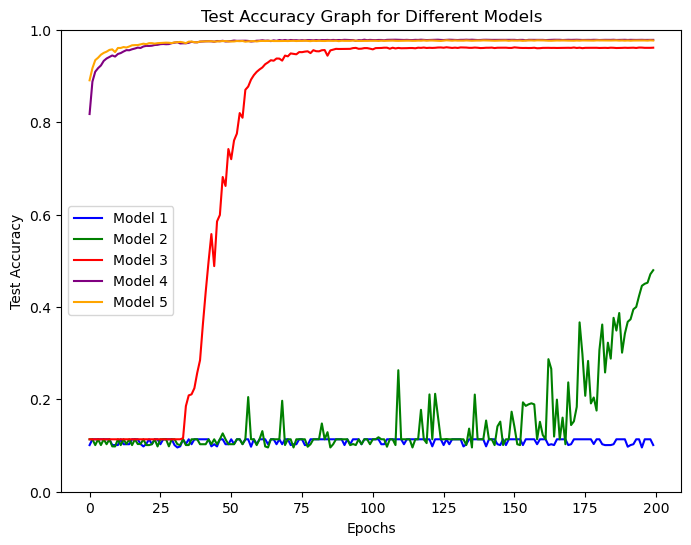

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(history_1.history['val_accuracy'], label='Model 1', color='blue')
plt.plot(history_2.history['val_accuracy'], label='Model 2', color='green')
plt.plot(history_3.history['val_accuracy'], label='Model 3', color='red')
plt.plot(history_4.history['val_accuracy'], label='Model 4', color='purple')
plt.plot(history_5.history['val_accuracy'], label='Model 5', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.title('Test Accuracy Graph for Different Models')
plt.show()
